In [2]:
import sys
sys.path.insert(1, '../utils')

import pandas as pd
import matplotlib.pyplot as plt
import ds_functions as ds

from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
data.shape

(299, 13)

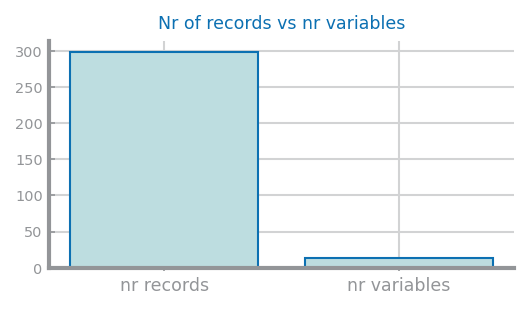

In [3]:
plt.figure(figsize=(4,2))
values = {'nr records': data.shape[0], 'nr variables': data.shape[1]}
ds.bar_chart(values.keys(), values.values(), title='Nr of records vs nr variables')

In [4]:
data.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [5]:
data = data.astype({
    'anaemia': bool, 
    'diabetes': bool, 
    'high_blood_pressure': bool, 
    'sex': bool,
    'smoking': bool,
    'DEATH_EVENT': bool
})
data.dtypes

age                         float64
anaemia                        bool
creatinine_phosphokinase      int64
diabetes                       bool
ejection_fraction             int64
high_blood_pressure            bool
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                            bool
smoking                        bool
time                          int64
DEATH_EVENT                    bool
dtype: object

dict_values([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

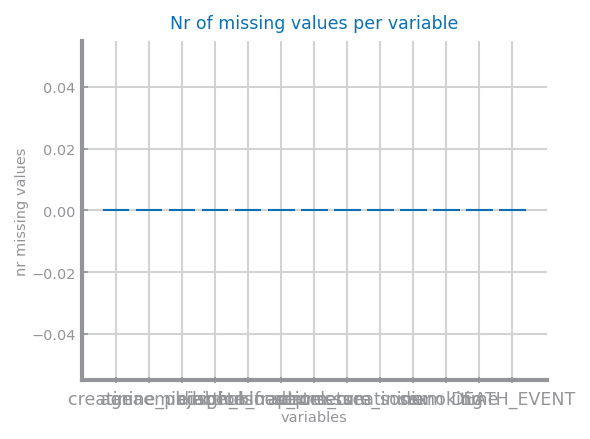

In [6]:
plt.figure()
mv = {}
for var in data:
    mv[var] = data[var].isna().sum()
ds.bar_chart(mv.keys(), mv.values(), title='Nr of missing values per variable',
               xlabel='variables', ylabel='nr missing values')
mv.values()

## Summary

* There are 299 records and 13 variables
    * This implies a ratio of 23 records per variable
* Variable types:
| variable                      | type    |
|:------------------------------|:--------|
| age                           | float64 |
| anaemia                       | bool    |
| creatinine_phosphokinase      | int64   |
| diabetes                      | bool    |
| ejection_fraction             | int64   |
| high_blood_pressure           | bool    |
| platelets                     | float64 |
| serum_creatinine              | float64 |
| serum_sodium                  | int64   |
| sex                           | bool    |
| smoking                       | bool    |
| time                          | int64   |
| DEATH_EVENT                   | bool    |

* There are no missing values in the dataset